## Used Dataset
Fake And Real Dataset: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

### Future work 
https://github.com/kavgan/OpinRank.git

In [7]:
import sys
sys.path.append('.env/lib/python3.7/site-packages')

In [10]:
import torch
#torch.cuda.is_available()

from torch.nn import Softmax
from torch.nn.functional import cross_entropy
from transformers import BertForSequenceClassification,AutoModel,AutoModelForSequenceClassification
from transformers import BertTokenizer,AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')

import pandas as pd
import numpy as np

from prettytable import PrettyTable

from sklearn.model_selection import train_test_split


def count_parameters(model):
    
    reset = "\033[0m"
    red =  "\033[0;31;40m" #RED
    
    table = PrettyTable(["Modules", "Parameters","Shape"])
    total_params = 0
    total_trainable_params = 0
    for name, parameter in model.named_parameters():
        param = parameter.numel()
        shape = parameter.size()
        total_params+=param
        
        if parameter.requires_grad:
            total_trainable_params+=param
            table.add_row([name, red + str(param) + reset,shape],)
        
        else:
            table.add_row([name, str(param),shape],)
    print(table)
    print()
    print(f"Total Params: {total_params}")
    print(f"Total Trainable Params: {total_trainable_params}")
    return total_params

class TorchTransf():
    
    def __init__(self,model,tokenizer):
        self.model = model
        self.tokenizer = tokenizer
    
    def encode_text(self,list_docs):
        
        text_batch = list(list_docs)
        encoding = self.tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True)
        input_ids = encoding['input_ids']
        attention_mask = encoding['attention_mask']
        
        return input_ids,attention_mask

    def infer_logits(self,list_docs):
        
        self.model.eval()
        
        input_ids,attention_mask = self.encode_text(list_docs)
        outputs = model(input_ids, attention_mask=attention_mask)

        return outputs.logits
    
    
    def predict_proba(self,list_docs):
        
        logits = infer_logits(self,list_docs)
        
        softmax = Softmax(dim=1)
        softmax(logits)
        
        
    def ce_loss(self,list_docs,y_true):
        
        logits = self.infer_logits(list_docs)
        
        #da para melhorar este encadeamento
        if isinstance(y_true,np.ndarray):
            y_true = torch.tensor(y_true)
            
        elif not isinstance(y_true,torch.Tensor):
            y_true = torch.tensor(y_true.values)
            
        return cross_entropy(input=logits,target=y_true)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [11]:
#preparing the data
fake_df = pd.read_csv("../data/Fake.csv")
true_df = pd.read_csv("../data/True.csv")

fake_df['true_y'] = 0
true_df['true_y'] = 1

sampled_true_df = true_df.sample(128)
sampled_fake_df = fake_df.sample(128)

df = pd.concat([sampled_fake_df,sampled_true_df],axis=0).reset_index(drop=True)
df = df[['text','true_y']].sample(len(df))

X = df['text']
y = df['true_y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
model.train()
print()

In [6]:
for param in model.base_model.parameters():
    param.requires_grad = False
    
count_parameters(model)

+---------------------------------------------------------+------------+--------------------------+
|                         Modules                         | Parameters |          Shape           |
+---------------------------------------------------------+------------+--------------------------+
|          bert.embeddings.word_embeddings.weight         |  23440896  | torch.Size([30522, 768]) |
|        bert.embeddings.position_embeddings.weight       |   393216   |  torch.Size([512, 768])  |
|       bert.embeddings.token_type_embeddings.weight      |    1536    |   torch.Size([2, 768])   |
|             bert.embeddings.LayerNorm.weight            |    768     |    torch.Size([768])     |
|              bert.embeddings.LayerNorm.bias             |    768     |    torch.Size([768])     |
|     bert.encoder.layer.0.attention.self.query.weight    |   589824   |  torch.Size([768, 768])  |
|      bert.encoder.layer.0.attention.self.query.bias     |    768     |    torch.Size([768])     |


109483778

In [7]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=1e-5)

- 1 - 709 ms ± 141 ms
- 2 - 1.52 s ± 205 ms
- 3 - 2.91 s ± 204 ms
- 5 - 
- 10 - 12.3 s ± 17.3 ms per loop
- 20 -
- 30

In [8]:
def encode_text(list_docs):
    
    text_batch = list(list_docs)
    encoding = tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True)
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']
    
    return input_ids,attention_mask

In [9]:
loss_train = tt.ce_loss(df_loss_train,y_true_loss_train)

NameError: name 'tt' is not defined

In [41]:
epochs = 2
batch_size = 16
losses,logits = [],[]

train_epoch_loss,test_epoch_loss = [],[]

for n_epoch in range(epochs):
    
    #define number of batches
    batches = len(X_train)//batch_size
    dp_number = 0
    batch_round = 0
    
    model.train() #garantir em modo de treinamento
    
    for batch in range(batches):
        
        input_ids,attention_mask = encode_text(X_train[dp_number:dp_number+ batch_size].values)

        print("Batch Round",'------',batch_round)
        outputs = model(input_ids, attention_mask=attention_mask, labels=torch.tensor(y_train[dp_number:dp_number+ batch_size].values))

        loss = outputs.loss
        loss.backward()
        losses.append(loss.item())

        optimizer.step()
        dp_number += 1
        batch_round += 1
        
        
    print ("Epoch ended")
    
    tt = TorchTransf(model,tokenizer)
    
    df_loss_train = X_train.sample(batch_size)
    y_true_loss_train = y_train[df_loss_train.index]
    
    df_loss_test = X_test.sample(batch_size)
    y_true_loss_test = y_test[df_loss_test.index]
    
    loss_train = tt.ce_loss(df_loss_train,y_true_loss_train)
    loss_test = tt.ce_loss(df_loss_test,y_true_loss_test)
    
    train_epoch_loss.append(loss_train)
    test_epoch_loss.append(loss_test)
    print('Train Epoch: ',train_epoch_loss , '=================','Test Epoch: ',test_epoch_loss)

Batch Round ------ 0
Batch Round ------ 1
Batch Round ------ 2
Batch Round ------ 3
Batch Round ------ 4
Batch Round ------ 5
Batch Round ------ 6
Batch Round ------ 7
Batch Round ------ 8
Batch Round ------ 9
Batch Round ------ 10
Batch Round ------ 11
Epoch ended
Batch Round ------ 0
Batch Round ------ 1
Batch Round ------ 2
Batch Round ------ 3
Batch Round ------ 4
Batch Round ------ 5
Batch Round ------ 6
Batch Round ------ 7
Batch Round ------ 8
Batch Round ------ 9
Batch Round ------ 10
Batch Round ------ 11
Epoch ended


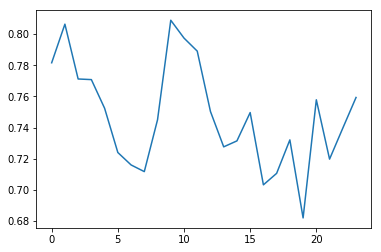

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

### Hugging Face Example

In [16]:
from nlp import load_dataset

def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

train_dataset, test_dataset = load_dataset('imdb',
                                           split=['train[-10%:] + train[:10%]', 
                                                  'test[-10%:] + test[:10%]', ])

In [17]:
train_dataset = train_dataset.map(tokenize, batched=True, batch_size=32)
test_dataset = test_dataset.map(tokenize, batched=True, batch_size=32)
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [18]:
from transformers import Trainer, TrainingArguments
from sklearn.metrics import precision_recall_fscore_support,accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

In [19]:
import gc

gc.collect()
torch.cuda.empty_cache()

In [20]:
 print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  428781 KB |  428781 KB |  428781 KB |       0 B  |
|       from large pool |  428288 KB |  428288 KB |  428288 KB |       0 B  |
|       from small pool |     493 KB |     493 KB |     493 KB |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |  428781 KB |  428781 KB |  428781 KB |       0 B  |
|       from large pool |  428288 KB |  428288 KB |  428288 KB |

In [21]:
trainer.train()

RuntimeError: CUDA error: CUBLAS_STATUS_INTERNAL_ERROR when calling `cublasCreate(handle)`

In [ ]:
trainer.evaluate()

0

In [ ]:
torch.cuda.current_device()
torch.cuda.device(0)
torch.cuda.device_count()
torch.cuda.get_device_name(0)

1

'Tesla T4'